In [1]:
import numpy as np

def read_data(file_path):
    data = np.loadtxt(file_path)
    return data

file_path = 'CS205_small_Data__32.txt'
data = read_data(file_path)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(500, 13)


This dataset has 12 features, with 500 instances.
Beginning forward selection search.
On the Oth level of the search tree. Accuracy is 50%.
On the 1th level of the search tree
--> Using feature(s) [1], got accuracy 69.0%
--> Using feature(s) [2], got accuracy 68.2%
--> Using feature(s) [3], got accuracy 68.8%
--> Using feature(s) [4], got accuracy 84.8%
--> Using feature(s) [5], got accuracy 75.0%
--> Using feature(s) [6], got accuracy 71.6%
--> Using feature(s) [7], got accuracy 68.0%
--> Using feature(s) [8], got accuracy 68.8%
--> Using feature(s) [9], got accuracy 70.4%
--> Using feature(s) [10], got accuracy 70.2%
--> Using feature(s) [11], got accuracy 72.2%
--> Using feature(s) [12], got accuracy 72.2%
On level 1, added feature 4 to current set, accuracy is 84.8
On the 2th level of the search tree
--> Using feature(s) [4, 1], got accuracy 84.6%
--> Using feature(s) [4, 2], got accuracy 82.4%
--> Using feature(s) [4, 3], got accuracy 84.0%
--> Using feature(s) [4, 5], got accurac

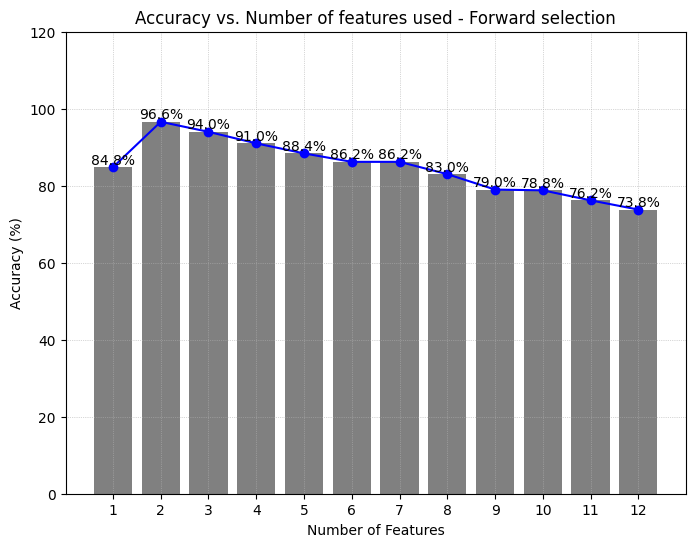

Number of features 1 ----- [4]
Number of features 2 ----- [4, 5]
Number of features 3 ----- [4, 5, 6]
Number of features 4 ----- [4, 5, 6, 2]
Number of features 5 ----- [4, 5, 6, 2, 12]
Number of features 6 ----- [4, 5, 6, 2, 12, 7]
Number of features 7 ----- [4, 5, 6, 2, 12, 7, 1]
Number of features 8 ----- [4, 5, 6, 2, 12, 7, 1, 10]
Number of features 9 ----- [4, 5, 6, 2, 12, 7, 1, 10, 11]
Number of features 10 ----- [4, 5, 6, 2, 12, 7, 1, 10, 11, 3]
Number of features 11 ----- [4, 5, 6, 2, 12, 7, 1, 10, 11, 3, 8]
Number of features 12 ----- [4, 5, 6, 2, 12, 7, 1, 10, 11, 3, 8, 9]


In [16]:
import matplotlib.pyplot as plt

def leave_one_out(data, current_ft, ft_to_add):
    num_correct = 0
    num_rec, num_cols = data.shape
    data_new = np.zeros_like(data) #set everything to zero
    data_new[:, 0] = data[:, 0]  #label column
    ft_ids = current_ft + [ft_to_add] #all ft ids in work here

    for id in ft_ids: #ft 1 will just be col 1
        data_new[:, id] = data[:, id]  #copy the ft cols

    for i in range(num_rec):#loop through all dp,
        val_ft = data_new[i, 1:] #leave this one out, val only contains 1
        val_label = int(data[i, 0]) #convert to integer

        min_dist = float('inf')
        nn_index = -1


        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = np.sum((val_ft - data_new[k, 1:]) ** 2) #distance squared
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(data[nn_index, 0]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def forward_selection(data):
    num_rec, num_cols = data.shape

    current_ft = []
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')
    print('Beginning forward selection search.')
    print('On the Oth level of the search tree. Accuracy is 50%.')

    ft_num_list = []
    ft_set_list = []
    acc_list = []


    for i in range(1,num_cols):
        print(f'On the {i}th level of the search tree')
        ft_to_add = -1
        max_accuracy = 50
        ft_num_list.append(i)

        for k in range(1,num_cols):
            if k not in current_ft: #then we can consider adding k

                accuracy = leave_one_out(data, current_ft, k)
                cur_list = current_ft+[k]
                print(f'--> Using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_add = k

        current_ft.append(ft_to_add)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, added feature {ft_to_add} to current set, accuracy is {max_accuracy}')


    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to

    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

forward_selection(data)


This dataset has 12 features, with 500 instances.
Beginning backward elimination search.
On the 12th level of the search tree. Accuracy is 73.8%.
On the 11th level of the search tree
--> Remove 1, using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 76.4%
--> Remove 2, using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 75.8%
--> Remove 3, using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 75.2%
--> Remove 4, using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 68.6%
--> Remove 5, using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12], got accuracy 71.2%
--> Remove 6, using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12], got accuracy 75.0%
--> Remove 7, using feature(s) [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], got accuracy 72.4%
--> Remove 8, using feature(s) [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], got accuracy 75.4%
--> Remove 9, using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12], got accuracy 76.2%
--> Remove 10, using feat

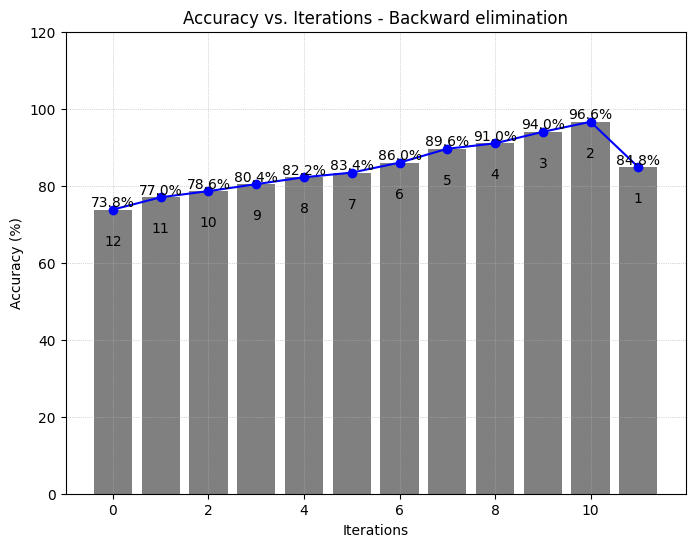

Number of features 12 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Number of features 11 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Number of features 10 ----- [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]
Number of features 9 ----- [2, 3, 4, 5, 6, 7, 8, 10, 11]
Number of features 8 ----- [2, 3, 4, 5, 6, 7, 10, 11]
Number of features 7 ----- [2, 4, 5, 6, 7, 10, 11]
Number of features 6 ----- [2, 4, 5, 6, 7, 10]
Number of features 5 ----- [4, 5, 6, 7, 10]
Number of features 4 ----- [4, 5, 6, 7]
Number of features 3 ----- [4, 5, 6]
Number of features 2 ----- [4, 5]
Number of features 1 ----- [4]


In [31]:


def leave_one_out(data, current_ft, ft_to_remove):
    num_correct = 0
    num_rec, num_cols = data.shape
    data_new = np.zeros_like(data) #set everything to zero
    data_new[:, 0] = data[:, 0]  #label column
    ft_ids = current_ft.copy()
    if ft_to_remove != -1:
        ft_ids.remove(ft_to_remove) #all ft ids in work here

    for id in ft_ids: #ft 1 will just be col 1
            data_new[:, id] = data[:, id]  #copy the ft cols

    for i in range(num_rec):#loop through all dp,
        val_ft = data_new[i, 1:] #leave this one out, val only contains 1
        val_label = int(data[i, 0]) #convert to integer

        min_dist = float('inf')
        nn_index = -1


        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = np.sum((val_ft - data_new[k, 1:]) ** 2) #distance squared
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(data[nn_index, 0]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def backward_elimination(data):
    num_rec, num_cols = data.shape

    current_ft = []
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')

    #create ft list
    for i in range(1,num_cols):
      current_ft.append(i)

    print('Beginning backward elimination search.')
    acc_last = leave_one_out(data, current_ft, -1)
    print(f'On the {num_cols-1}th level of the search tree. Accuracy is {acc_last}%.')

    num_removed_list = [0]
    ft_num_list = [num_cols-1]
    ft_set_list = [current_ft.copy()]
    acc_list = [acc_last]
    j=0

    for i in range(num_cols-2,0,-1):
        print(f'On the {i}th level of the search tree')
        ft_to_remove = -1
        max_accuracy = 0
        ft_num_list.append(i)
        j+=1
        num_removed_list.append(j)

        for k in range(1,num_cols):
            if k in current_ft: #then we can consider removing k
                accuracy = leave_one_out(data, current_ft, k)
                cur_list = current_ft.copy()
                cur_list.remove(k)
                print(f'--> Remove {k}, using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_remove = k

        current_ft.remove(ft_to_remove)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, removed feature {ft_to_remove} to current set, accuracy is {max_accuracy}%')

    plt.figure(figsize=(8, 6))
    plt.plot(num_removed_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(num_removed_list, acc_list, color='gray')
    i = 0
    for bar in bars:

            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
            plt.text(bar.get_x() + bar.get_width() / 2, yval - 10, f'{ft_num_list[i]}', ha='center', va='bottom')
            i+=1

    plt.ylim(0, 120)
    plt.title('Accuracy vs. Iterations - Backward elimination')
    plt.xlabel('Iterations')
    print(ft_num_list)

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

        #print what each num corresponds to
    #print(len(ft_num_list))
    #print(len(ft_set_list))
    itr = 0
    for l in ft_set_list:
          print(f'Number of features {ft_num_list[itr]} ----- {l}')
          itr+=1


backward_elimination(data)


In [32]:

def read_data(file_path):
    data = np.loadtxt(file_path)
    return data

file_path = 'CS205_large_Data__43.txt'
data = read_data(file_path)
print(type(data))
print(data.shape)

import matplotlib.pyplot as plt

def leave_one_out(data, current_ft, ft_to_add):
    num_correct = 0
    num_rec, num_cols = data.shape
    data_new = np.zeros_like(data) #set everything to zero
    data_new[:, 0] = data[:, 0]  #label column
    ft_ids = current_ft + [ft_to_add] #all ft ids in work here

    for id in ft_ids: #ft 1 will just be col 1
        data_new[:, id] = data[:, id]  #copy the ft cols

    for i in range(num_rec):#loop through all dp,
        val_ft = data_new[i, 1:] #leave this one out, val only contains 1
        val_label = int(data[i, 0]) #convert to integer

        min_dist = float('inf')
        nn_index = -1


        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = np.sum((val_ft - data_new[k, 1:]) ** 2) #distance squared
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(data[nn_index, 0]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def forward_selection(data):
    num_rec, num_cols = data.shape

    current_ft = []
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')
    print('Beginning forward selection search.')
    print('On the Oth level of the search tree. Accuracy is 50%.')

    ft_num_list = []
    ft_set_list = []
    acc_list = []


    for i in range(1,num_cols):
        print(f'On the {i}th level of the search tree')
        ft_to_add = -1
        max_accuracy = 50
        ft_num_list.append(i)

        for k in range(1,num_cols):
            if k not in current_ft: #then we can consider adding k

                accuracy = leave_one_out(data, current_ft, k)
                cur_list = current_ft+[k]
                print(f'--> Using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_add = k

        current_ft.append(ft_to_add)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, added feature {ft_to_add} to current set, accuracy is {max_accuracy}')


    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to

    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

forward_selection(data)


<class 'numpy.ndarray'>
(5000, 51)
This dataset has 50 features, with 5000 instances.
Beginning forward selection search.
On the Oth level of the search tree. Accuracy is 50%.
On the 1th level of the search tree
--> Using feature(s) [1], got accuracy 68.76%
--> Using feature(s) [2], got accuracy 69.4%
--> Using feature(s) [3], got accuracy 69.08%
--> Using feature(s) [4], got accuracy 68.5%


KeyboardInterrupt: 

In [35]:

def read_data(file_path):
    data = np.loadtxt(file_path)
    return data

file_path = 'CS205_large_Data__43.txt'
data = read_data(file_path)
print(type(data))
print(data.shape)

import matplotlib.pyplot as plt


######## modify for cache

def leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_add_col):
    num_correct = 0


    for i in range(num_rec):#loop through all dp,
        val_ft =ft_to_add_col[i] #leave this one out, val only contains 1
        val_label = int(labels[i]) #convert to integer

        min_dist = float('inf')
        nn_index = -1

        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = prev_dist[i][k]+ (val_ft-ft_to_add_col[k])**2
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(labels[nn_index]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def forward_selection(data):
    num_rec, num_cols = data.shape
    labels = data[:,0]
    prev_dist = np.zeros((num_rec, num_rec))
    current_ft = []
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')
    print('Beginning forward selection search.')
    print('On the Oth level of the search tree. Accuracy is 50%.')

    ft_num_list = []
    ft_set_list = []
    acc_list = []


    for i in range(1,num_cols):
        print(f'On the {i}th level of the search tree')
        ft_to_add = -1
        max_accuracy = 50
        ft_num_list.append(i)

        for k in range(1,num_cols):
            if k not in current_ft: #then we can consider adding k

                ft_to_add_col = data[:,k]
                accuracy = leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_add_col)
                cur_list = current_ft+[k]
                print(f'--> Using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_add = k

        #need to update prev_dist table
        #update for every potential val point, its distance with other ones
        for i in range(num_rec):#loop through all dp,
            for k in range(num_rec): #loop through its neighbors
                if k != i: #meaning it's not itself
                      distance_p2 = prev_dist[i][k]+ (data[i][ft_to_add]-data[k][ft_to_add])**2
                      prev_dist[i][k] = distance_p2

        current_ft.append(ft_to_add)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, added feature {ft_to_add} to current set, accuracy is {max_accuracy}')


    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to

    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

forward_selection(data)


<class 'numpy.ndarray'>
(5000, 51)
This dataset has 50 features, with 5000 instances.
Beginning forward selection search.
On the Oth level of the search tree. Accuracy is 50%.
On the 1th level of the search tree
--> Using feature(s) [1], got accuracy 68.76%
--> Using feature(s) [2], got accuracy 69.4%
--> Using feature(s) [3], got accuracy 69.08%
--> Using feature(s) [4], got accuracy 68.5%
--> Using feature(s) [5], got accuracy 68.42%
--> Using feature(s) [6], got accuracy 68.8%
--> Using feature(s) [7], got accuracy 70.0%
--> Using feature(s) [8], got accuracy 69.24%
--> Using feature(s) [9], got accuracy 68.68%
--> Using feature(s) [10], got accuracy 68.94%
--> Using feature(s) [11], got accuracy 68.48%
--> Using feature(s) [12], got accuracy 68.96%
--> Using feature(s) [13], got accuracy 84.44%
--> Using feature(s) [14], got accuracy 68.64%
--> Using feature(s) [15], got accuracy 69.16%
--> Using feature(s) [16], got accuracy 69.0%
--> Using feature(s) [17], got accuracy 70.36%
-->

KeyboardInterrupt: 

<class 'numpy.ndarray'>
(5000, 51)
This dataset has 50 features, with 5000 instances.
Beginning forward selection search.
On the Oth level of the search tree. Accuracy is 50%.
On the 1th level of the search tree
Will investigate top 50 nodes. 
--> Using feature(s) [1], got accuracy 68.76%
--> Using feature(s) [2], got accuracy 69.4%
--> Using feature(s) [3], got accuracy 69.08%
--> Using feature(s) [4], got accuracy 68.5%
--> Using feature(s) [5], got accuracy 68.42%
--> Using feature(s) [6], got accuracy 68.8%
--> Using feature(s) [7], got accuracy 70.0%
--> Using feature(s) [8], got accuracy 69.24%
--> Using feature(s) [9], got accuracy 68.68%
--> Using feature(s) [10], got accuracy 68.94%
--> Using feature(s) [11], got accuracy 68.48%
--> Using feature(s) [12], got accuracy 68.96%
--> Using feature(s) [13], got accuracy 84.44%
--> Using feature(s) [14], got accuracy 68.64%
--> Using feature(s) [15], got accuracy 69.16%
--> Using feature(s) [16], got accuracy 69.0%
--> Using feature(

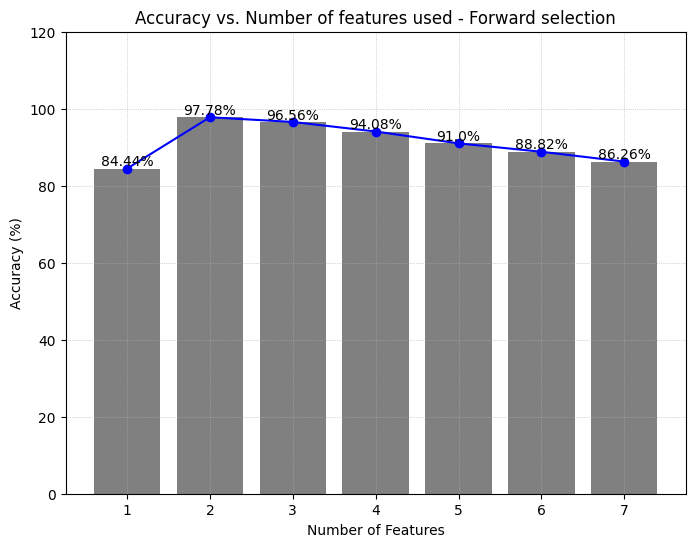

Number of features 1 ----- [13]
Number of features 2 ----- [13, 36]
Number of features 3 ----- [13, 36, 44]
Number of features 4 ----- [13, 36, 44, 47]
Number of features 5 ----- [13, 36, 44, 47, 16]
Number of features 6 ----- [13, 36, 44, 47, 16, 2]
Number of features 7 ----- [13, 36, 44, 47, 16, 2, 24]


In [55]:

def read_data(file_path):
    data = np.loadtxt(file_path)

    return data

file_path = 'CS205_large_Data__43.txt'
data = read_data(file_path)
print(type(data))
print(data.shape)

import matplotlib.pyplot as plt
import heapq
import math

######## modify for cache
####### modify for cache, and also selecting features

def leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_add_col):
    num_correct = 0


    for i in range(num_rec):#loop through all dp,
        val_ft =ft_to_add_col[i] #leave this one out, val only contains 1
        val_label = int(labels[i]) #convert to integer

        min_dist = float('inf')
        nn_index = -1

        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = prev_dist[i][k]+ (val_ft-ft_to_add_col[k])**2
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(labels[nn_index]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def forward_selection(data):
    num_rec, num_cols = data.shape
    labels = data[:,0]
    prev_dist = np.zeros((num_rec, num_rec))
    current_ft = []
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')
    print('Beginning forward selection search.')

    ft_num_list = []
    ft_set_list = []
    acc_list = []



    print('On the Oth level of the search tree. Accuracy is 50%.')

    new_num = 2*(num_cols-1)
    ft_heap = []
    for i in range(1,num_cols):
        print(f'On the {i}th level of the search tree')
        ft_to_add = -1
        max_accuracy = 50


        add_ft_list = []
        add_ft_acc = []


        #retrieve from heap
        prev_num = new_num
        new_num = math.ceil(new_num/2)
        print(f'Will investigate top {new_num} nodes. ')
        top_tuples = heapq.nsmallest(new_num, ft_heap)
        top_ft = [ft for _, ft in top_tuples]

        if i==1:
          top_ft = list(range(1,num_cols))
        elif not top_ft:#if empty
          break

        ft_num_list.append(i)

        for k in top_ft:
            #if k not in current_ft: #then we can consider adding k
                ft_to_add_col = data[:,k]
                accuracy = leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_add_col)
                cur_list = current_ft+[k]
                add_ft_list.append(k)
                add_ft_acc.append(accuracy)

                print(f'--> Using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_add = k

        #need to update prev_dist table
        #update for every potential val point, its distance with other ones
        for p in range(num_rec):#loop through all dp,
            for k in range(num_rec): #loop through its neighbors
                if k != p: #meaning it's not itself
                      distance_p2 = prev_dist[p][k]+ (data[p][ft_to_add]-data[k][ft_to_add])**2
                      prev_dist[p][k] = distance_p2



        ft_heap = []

        for ft, acc in zip(add_ft_list, add_ft_acc):
            heapq.heappush(ft_heap, (acc*(-1), ft)) #because we want max heap

        print('Ordering of accuracy and features is below:')
        print(ft_heap)

        #remove the newly selected
        heapq.heappop(ft_heap)



        current_ft.append(ft_to_add)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, added feature {ft_to_add} to current set, accuracy is {max_accuracy}%')


    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to

    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

forward_selection(data)


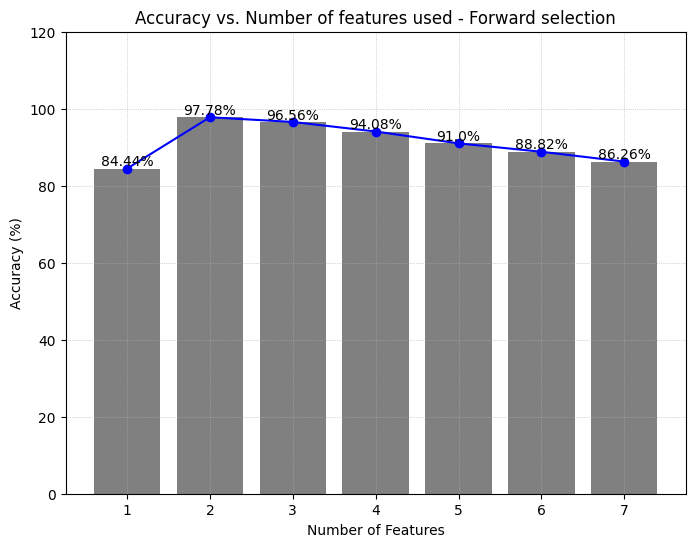

Number of features 1 ----- [13]
Number of features 2 ----- [13, 36]
Number of features 3 ----- [13, 36, 44]
Number of features 4 ----- [13, 36, 44, 47]
Number of features 5 ----- [13, 36, 44, 47, 16]
Number of features 6 ----- [13, 36, 44, 47, 16, 2]
Number of features 7 ----- [13, 36, 44, 47, 16, 2, 24]


In [48]:

    ft_set_list = []
    acc_list = []
    ft_set_list.append([13])
    acc_list.append(84.44)
    ft_set_list.append([13, 36])
    acc_list.append(97.78)
    ft_set_list.append([13, 36, 44])
    acc_list.append(96.56)
    ft_set_list.append([13, 36, 44, 47])
    acc_list.append(94.08)
    ft_set_list.append([13, 36, 44, 47, 16])
    acc_list.append(91.0)
    ft_set_list.append([13, 36, 44, 47, 16, 2])
    acc_list.append(88.82)
    ft_set_list.append([13, 36, 44, 47, 16, 2, 24])
    acc_list.append(86.26)
    ft_num_list = [1, 2, 3, 4, 5, 6, 7]

    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to

    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

<class 'numpy.ndarray'>
(1250, 51)
This dataset has 50 features, with 1250 instances.
Beginning backward elimination search.
On the 50th level of the search tree. Accuracy is 67.44%.
On the 1th level of the search tree
Ordering of accuracy and features is below:
[(-70.0, 26), (-68.56, 2), (-69.68, 21), (-68.48, 39), (-68.48, 10), (-68.24, 14), (-68.16, 7), (-68.0, 32), (-68.08, 18), (-68.4, 1), (-68.32, 22), (-67.68, 48), (-67.76, 24), (-67.84, 28), (-68.08, 15), (-67.68, 33), (-67.92, 35), (-67.68, 8), (-68.0, 36), (-68.0, 40), (-68.32, 43), (-67.92, 44), (-67.52, 46), (-67.44, 49), (-66.88, 25), (-66.88, 12), (-67.6, 27), (-67.6, 3), (-67.76, 29), (-67.12, 30), (-67.12, 31), (-65.44, 16), (-67.2, 17), (-66.4, 4), (-67.12, 34), (-67.36, 9), (-66.88, 37), (-66.88, 38), (-67.6, 19), (-67.36, 20), (-66.64, 41), (-67.36, 5), (-67.52, 42), (-67.28, 11), (-67.04, 45), (-66.96, 23), (-67.36, 47), (-66.8, 6), (-66.96, 13), (-66.08, 50)]
============current set is [1, 2, 3, 4, 5, 6, 7, 8, 9, 1

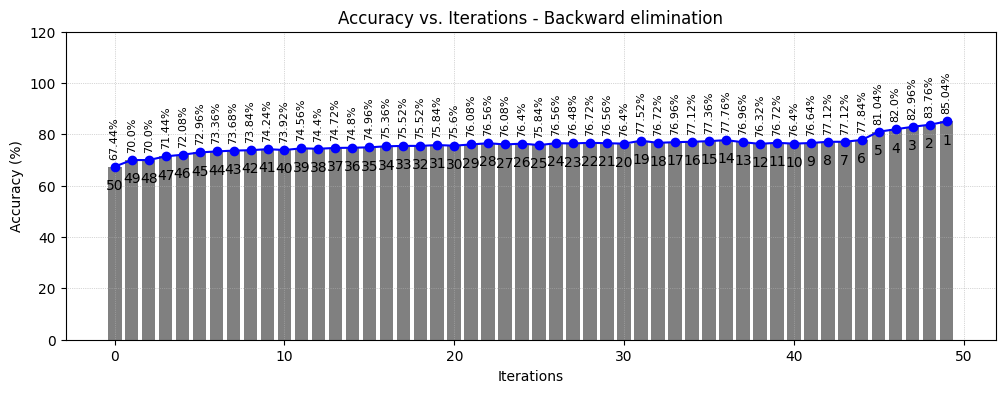

corresponding set
Number of features 50 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Number of features 49 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Number of features 48 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Number of features 47 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Number of features 46 ----- [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 3

In [21]:

import numpy as np

# def read_data(file_path):
#     data = np.loadtxt(file_path)
#     reduced_data = data[::8]

#     return reduced_data

def read_data(file_path):
    data = np.loadtxt(file_path)
    k = 4
    sample_size = int(len(data)/k)
    sampled_indices = np.random.choice(len(data), size=sample_size, replace=False)
    sampled_data = data[sampled_indices]
    return sampled_data

file_path = 'CS205_large_Data__43.txt'
data = read_data(file_path)
print(type(data))
print(data.shape)



import matplotlib.pyplot as plt
import heapq
import math

######## modify for cache
####### modify for cache, and also selecting features
######## backward

def leave_one_out_add(labels,num_rec,num_cols, prev_dist,ft_to_add_col):
    num_correct = 0


    for i in range(num_rec):#loop through all dp,
        val_ft =ft_to_add_col[i] #leave this one out, val only contains 1
        val_label = int(labels[i]) #convert to integer

        min_dist = float('inf')
        nn_index = -1

        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = prev_dist[i][k]+ (val_ft-ft_to_add_col[k])**2
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(labels[nn_index]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_rm_col):
    num_correct = 0


    for i in range(num_rec):#loop through all dp,
        val_ft =ft_to_rm_col[i] #leave this one out, val only contains 1
        val_label = int(labels[i]) #convert to integer

        min_dist = float('inf')
        nn_index = -1

        for k in range(num_rec):
            if k != i: #meaning it's the given data
                distance_p2 = prev_dist[i][k]- (val_ft-ft_to_rm_col[k])**2
                if distance_p2 < min_dist:
                    min_dist = distance_p2
                    nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(labels[nn_index]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def backward_elimination(data):
    num_rec, num_cols = data.shape
    labels = data[:,0]
    prev_dist = np.zeros((num_rec, num_rec))
    current_ft = []
    for i in range(1,num_cols):
      current_ft.append(i)
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')
    print('Beginning backward elimination search.')


    # prev_dist table
        #update for every potential val point, its distance with other ones
    for p in range(num_rec):#loop through all dp,
            for k in range(num_rec): #loop through its neighbors
                if k != p: #meaning it's not itself
                      distance_p2 = np.sum((data[p, 1:] - data[k, 1:]) ** 2)
                      prev_dist[p][k] = distance_p2

    ft_to_add_col = np.zeros((num_rec,1))
    acc_last = leave_one_out_add(labels,num_rec,num_cols, prev_dist,ft_to_add_col)

    num_removed_list = [0]
    ft_num_list = [num_cols-1]
    ft_set_list = [current_ft.copy()]
    acc_list = [acc_last]



    print(f'On the {num_cols-1}th level of the search tree. Accuracy is {acc_last}%.')

    new_num = (num_cols-1)
    ft_heap = []
    for i in range(1,num_cols-1):
        if(len(current_ft)==1):break
        print(f'On the {i}th level of the search tree')
        ft_to_rm = -1
        max_accuracy = 50

        add_ft_list = []
        add_ft_acc = []


        for k in current_ft:

                ft_to_rm_col = data[:,k]
                accuracy = leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_rm_col)
                cur_list = current_ft.copy()
                cur_list.remove(k)
                add_ft_list.append(k)
                add_ft_acc.append(accuracy)

                #print(f'--> Removed {k}, using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_rm = k

        #need to update prev_dist table
        #update for every potential val point, its distance with other ones
        for p in range(num_rec):#loop through all dp,
            for k in range(num_rec): #loop through its neighbors
                if k != p: #meaning it's not itself
                      distance_p2 = prev_dist[p][k]- (data[p][ft_to_rm]-data[k][ft_to_rm])**2
                      prev_dist[p][k] = distance_p2



        ft_heap = []

        for ft, acc in zip(add_ft_list, add_ft_acc):
            heapq.heappush(ft_heap, (acc*(-1), ft)) #because we want max heap

        print('Ordering of accuracy and features is below:')
        print(ft_heap)


        # new_num = math.floor(len(current_ft)/10)
        # if (new_num<1): # The last few remove 1 by 1
        #   new_num = 1
        new_num=1
        if(len(current_ft)==2):
          new_num=1
        top_tuples = heapq.nsmallest(new_num, ft_heap)
        top_ft = [ft for _, ft in top_tuples]
        if not top_ft: break

        print(f'============current set is {current_ft}')
        for t in top_ft:
          print(f'trying to remove {t}')
          current_ft.remove(t)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)
        ft_num_list.append(len(current_ft))
        num_removed_list.append(num_cols-1-len(current_ft))


        print(f'On level {i}, removed feature(s) {top_ft} to current set, accuracy is {max_accuracy}%')


    plt.figure(figsize=(12, 4))
    plt.plot(num_removed_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(num_removed_list, acc_list, color='gray')
    i=0
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval+3, f'{yval}%', ha='center', va='bottom',fontsize=8, rotation=90)
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 10, f'{ft_num_list[i]}', ha='center', va='bottom')
        i+=1
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Iterations - Backward elimination')
    plt.xlabel('Iterations')

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to
    print('corresponding set')
    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

backward_elimination(data)


In [ ]:

def read_data(file_path):
    data = np.loadtxt(file_path)
    return data

file_path = 'CS205_large_Data__43.txt'
data = read_data(file_path)
print(type(data))
print(data.shape)

import matplotlib.pyplot as plt


######## modify for cache
######## and also modify for fold number kf

def kfold_out(labels,num_rec,num_cols,num_folds, prev_dist,ft_to_add_col):
    num_correct = 0


    for kf in range(num_folds):#go section by section, 10 in total
        start_value = kf*5
        val_list = list(range(start_value,start_value+5))
        val_ft =ft_to_add_col[start_value,start_value+5] #these are teh features
        val_label = int(labels[i]) #convert to integer

        min_dist = float('inf')
        nn_index = -1

        for i in val_list:
            for k in range(num_rec):
                if k not in val_list: #meaning it's the given data
                    distance_p2 = prev_dist[i][k]+ (ft_to_add_col[i]-ft_to_add_col[k])**2
                    if distance_p2 < min_dist:
                        min_dist = distance_p2
                        nn_index = k #this is which dp is the nearest neighbor

        ##after looping through all dp, found nearest neighbor

        nn_label = int(labels[nn_index]) #convert to integer
        if val_label == nn_label:
            num_correct += 1

    accuracy = 100* num_correct / num_rec
    return accuracy

def forward_selection(data):
    num_rec, num_cols = data.shape
    labels = data[:,0]
    prev_dist = np.zeros((num_rec, num_rec))
    current_ft = []
    num_folds = int(num_rec/5)
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')
    print('Beginning forward selection search.')
    print('On the Oth level of the search tree. Accuracy is 50%.')

    ft_num_list = []
    ft_set_list = []
    acc_list = []


    for i in range(1,num_cols):
        print(f'On the {i}th level of the search tree')
        ft_to_add = -1
        max_accuracy = 50
        ft_num_list.append(i)

        for k in range(1,num_cols):
            if k not in current_ft: #then we can consider adding k

                ft_to_add_col = data[:,k]
                accuracy = leave_one_out(labels,num_rec,num_cols, prev_dist,ft_to_add_col)
                cur_list = current_ft+[k]
                print(f'--> Using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_add = k

        #need to update prev_dist table
        #update for every potential val point, its distance with other ones
        for i in range(num_rec):#loop through all dp,
            for k in range(num_rec): #loop through its neighbors
                if k != i: #meaning it's not itself
                      distance_p2 = prev_dist[i][k]+ (data[i][ft_to_add]-data[k][ft_to_add])**2
                      prev_dist[i][k] = distance_p2

        current_ft.append(ft_to_add)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, added feature {ft_to_add} to current set, accuracy is {max_accuracy}')


    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

    #print what each num corresponds to

    itr = 0
    for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1

forward_selection(data)


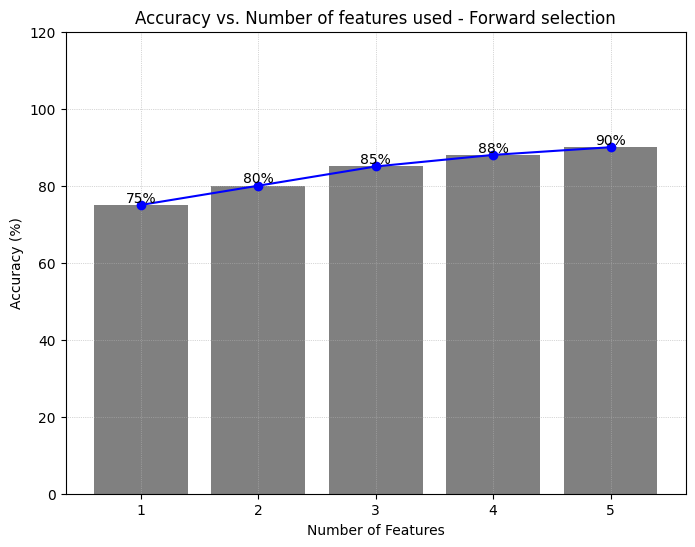

In [12]:

    import matplotlib.pyplot as plt
    ft_num_list = [1, 2, 3, 4, 5]
    acc_list = [75, 80, 85, 88, 90]
    plt.figure(figsize=(8, 6))
    plt.plot(ft_num_list, acc_list, marker='o', linestyle='-', color='b')
    bars = plt.bar(ft_num_list, acc_list, color='gray')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
        #plt.text(bar.get_x() + bar.get_width()/2, 0, f'{int(bar.get_x())+1}', ha='center', va='top', color='red')

    plt.ylim(0, 120)
    plt.title('Accuracy vs. Number of features used - Forward selection')
    plt.xlabel('Number of Features')
    plt.xticks(ft_num_list, [f'{i}' for i in ft_num_list])

    plt.ylabel('Accuracy (%)')
    plt.grid(True,linestyle=':', linewidth=0.5)
    plt.show()

In [42]:
ft = list(range(1, 51))  # Features from 1 to 50
acc = [0.75, 0.80, 0.78, 0.85, 0.90, 0.82, 0.79, 0.88, 0.93, 0.77,  # Example accuracies
       0.76, 0.81, 0.84, 0.87, 0.91, 0.83, 0.80, 0.85, 0.89, 0.78,
       0.82, 0.87, 0.92, 0.86, 0.79, 0.88, 0.93, 0.90, 0.85, 0.80,
       0.77, 0.83, 0.88, 0.92, 0.85, 0.87, 0.89, 0.91, 0.84, 0.78,
       0.82, 0.90, 0.85, 0.83, 0.80, 0.87, 0.89, 0.91, 0.88, 0.84]

# Pair the features with their accuracy values and push them into a max-heap (by inverting the accuracy values)
max_heap = []
for feature, accuracy in zip(ft, acc):
    heapq.heappush(max_heap, (-accuracy, feature))

# Print the heap before removal
print("Heap before removal:")
print(max_heap)

Heap before removal:
[(-0.93, 9), (-0.92, 23), (-0.93, 27), (-0.92, 34), (-0.9, 5), (-0.91, 15), (-0.9, 28), (-0.89, 19), (-0.91, 38), (-0.9, 42), (-0.89, 47), (-0.91, 48), (-0.88, 26), (-0.87, 14), (-0.84, 13), (-0.83, 16), (-0.88, 33), (-0.88, 8), (-0.89, 37), (-0.8, 2), (-0.85, 43), (-0.83, 44), (-0.87, 22), (-0.88, 49), (-0.84, 50), (-0.81, 12), (-0.86, 24), (-0.79, 7), (-0.85, 29), (-0.8, 30), (-0.77, 31), (-0.75, 1), (-0.83, 32), (-0.8, 17), (-0.85, 35), (-0.85, 18), (-0.87, 36), (-0.85, 4), (-0.84, 39), (-0.77, 10), (-0.78, 40), (-0.78, 20), (-0.82, 41), (-0.76, 11), (-0.8, 45), (-0.82, 21), (-0.87, 46), (-0.78, 3), (-0.82, 6), (-0.79, 25)]


In [40]:
# Define values for k and n
k = 2  # Example value for k
n = 5  # Example value for n

# Calculate the starting value
start_value = k * n + 0

# Generate the list
result_list = list(range(start_value, start_value+5))

# Print the result
print(result_list)

nl = result_list[1,2,3]
print(nl)

[10, 11, 12, 13, 14]


TypeError: list indices must be integers or slices, not tuple

In [23]:

    def leave_one_out(data, current_ft, ft_to_remove):
      num_correct = 0
      num_rec, num_cols = data.shape
      data_new = np.zeros_like(data) #set everything to zero
      data_new[:, 0] = data[:, 0]  #label column
      ft_ids = current_ft.copy()
      if ft_to_remove != -1:
          ft_ids.remove(ft_to_remove) #all ft ids in work here

      for id in ft_ids: #ft 1 will just be col 1
              data_new[:, id] = data[:, id]  #copy the ft cols

      for i in range(num_rec):#loop through all dp,
          val_ft = data_new[i, 1:] #leave this one out, val only contains 1
          val_label = int(data[i, 0]) #convert to integer

          min_dist = float('inf')
          nn_index = -1


          for k in range(num_rec):
              if k != i: #meaning it's the given data
                  distance_p2 = np.sum((val_ft - data_new[k, 1:]) ** 2) #distance squared
                  if distance_p2 < min_dist:
                      min_dist = distance_p2
                      nn_index = k #this is which dp is the nearest neighbor

          ##after looping through all dp, found nearest neighbor

          nn_label = int(data[nn_index, 0]) #convert to integer
          if val_label == nn_label:
              num_correct += 1

      accuracy = 100* num_correct / num_rec
      return accuracy


    num_rec, num_cols = data.shape

    current_ft = []
    print(f'This dataset has {num_cols-1} features, with {num_rec} instances.')

    #create ft list
    for i in range(1,num_cols):
      current_ft.append(i)

    print('Beginning backward elimination search.')
    acc_last = leave_one_out(data, current_ft, -1)
    print(f'On the {num_cols-1}th level of the search tree. Accuracy is {acc_last}%.')

    num_removed_list = [0]
    ft_num_list = [num_cols-1]
    ft_set_list = [current_ft.copy()]
    acc_list = [acc_last]
    j = 0
    for i in range(num_cols-2,0,-1):
        j+=1
        num_removed_list.append(j)
        print(f'On the {i}th level of the search tree')
        ft_to_remove = -1
        max_accuracy = 0
        ft_num_list.append(i)

        for k in range(1,num_cols):
            if k in current_ft: #then we can consider removing k
                accuracy = leave_one_out(data, current_ft, k)
                cur_list = current_ft.copy()
                cur_list.remove(k)
                print(f'--> Remove {k}, using feature(s) { cur_list }, got accuracy {accuracy}%')
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    ft_to_remove = k

        current_ft.remove(ft_to_remove)
        ft_set_list.append(current_ft.copy())
        acc_list.append(max_accuracy)

        print(f'On level {i}, removed feature {ft_to_remove} to current set, accuracy is {max_accuracy}%')




This dataset has 12 features, with 500 instances.
Beginning backward elimination search.
On the 12th level of the search tree. Accuracy is 73.8%.
On the 11th level of the search tree
--> Remove 1, using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 76.4%
--> Remove 2, using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 75.8%
--> Remove 3, using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 75.2%
--> Remove 4, using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], got accuracy 68.6%
--> Remove 5, using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12], got accuracy 71.2%
--> Remove 6, using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12], got accuracy 75.0%
--> Remove 7, using feature(s) [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], got accuracy 72.4%
--> Remove 8, using feature(s) [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], got accuracy 75.4%
--> Remove 9, using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12], got accuracy 76.2%
--> Remove 10, using feat

[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


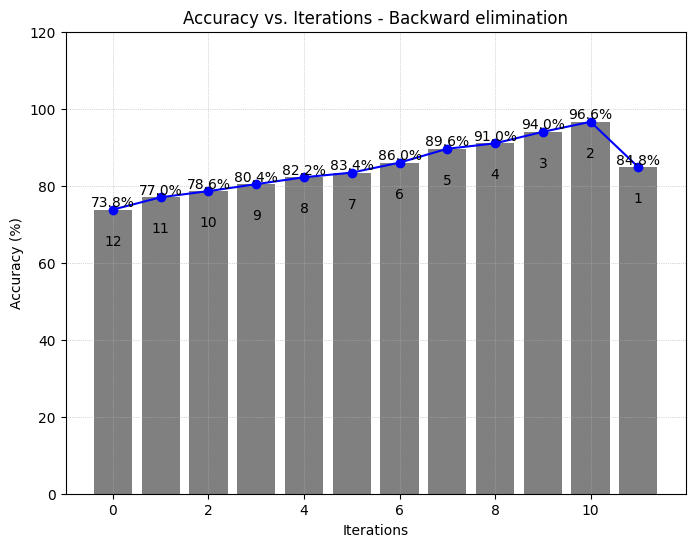

12
12
Number of features 12 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Number of features 11 ----- [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Number of features 10 ----- [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]
Number of features 9 ----- [2, 3, 4, 5, 6, 7, 8, 10, 11]
Number of features 8 ----- [2, 3, 4, 5, 6, 7, 10, 11]
Number of features 7 ----- [2, 4, 5, 6, 7, 10, 11]
Number of features 6 ----- [2, 4, 5, 6, 7, 10]
Number of features 5 ----- [4, 5, 6, 7, 10]
Number of features 4 ----- [4, 5, 6, 7]
Number of features 3 ----- [4, 5, 6]
Number of features 2 ----- [4, 5]
Number of features 1 ----- [4]


In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(num_removed_list, acc_list, marker='o', linestyle='-', color='b')
bars = plt.bar(num_removed_list, acc_list, color='gray')
i = 0
for bar in bars:

        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 10, f'{ft_num_list[i]}', ha='center', va='bottom')
        i+=1

plt.ylim(0, 120)
plt.title('Accuracy vs. Iterations - Backward elimination')
plt.xlabel('Iterations')
print(ft_num_list)

plt.ylabel('Accuracy (%)')
plt.grid(True,linestyle=':', linewidth=0.5)
plt.show()

    #print what each num corresponds to
#print(len(ft_num_list))
#print(len(ft_set_list))
itr = 0
for l in ft_set_list:
      print(f'Number of features {ft_num_list[itr]} ----- {l}')
      itr+=1